In [15]:
import cv2
import face_recognition as face
import os
import shutil
import random
import dlib
from matplotlib import pyplot as plt

In [16]:
# CUDA test
dlib.DLIB_USE_CUDA

False

In [17]:
def draw_bb(photo:str, top_left:tuple, bottom_right:tuple):
    """Takes a photo, top_left coordinates and bottom_right coordinates
       - returns the copy of the photo with bounding box drawn."""
    photo = cv2.imread(photo)
    photo_copy = photo.copy()
    
    BOUNDING_BOX_COLOR = (0, 0, 255)
    BOUNDING_BOX_THICKNESS = 1
    
    cv2.rectangle(photo_copy, top_left, bottom_right, BOUNDING_BOX_COLOR, BOUNDING_BOX_THICKNESS)
    return photo_copy

In [18]:
# constants
path_photos = "C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\teamphotos\\"
path_processing = "C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\processing\\"
path_results = "C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\teamphotos_ready\\"

In [19]:
ten_photos = os.listdir(path_photos)
ten_photos = [x for x in ten_photos if ".jpg" in x]
ten_photos

['IMG_1611.jpg', 'IMG_1613.jpg']

In [20]:
for photo in ten_photos:
    shutil.copy(os.path.join(path_photos, photo), path_processing)

In [21]:
# Append photos with BBs to list for plotting
# Get {filename.jpg:[BB coordinates]} dictionary for face extraction
bb_photos_list = []
coordinates = {}
for p in ten_photos:
    try:
        image = face.load_image_file(os.path.join(path_processing, p))
        face_coordinates = face.face_locations(image)
    
        if face_coordinates:
            left, bottom, right, top = face_coordinates[0]
            bb_photos_list.append(draw_bb(os.path.join(path_processing, p), (top, left), (bottom, right)))
            coordinates[p] = face_coordinates[0]
            print(str(face_coordinates) + " " + p)
        else:
            print("Could not find a face in {p}.")
    except:
        print(f"Error when processing {p} image.\nRetrying using HOG")
        
        image = face.load_image_file(os.path.join(path_processing, p))
        face_coordinates = face.face_locations(image)

        if face_coordinates:
            left, bottom, right, top = face_coordinates[0]
            bb_photos_list.append(draw_bb(os.path.join(path_processing, p), (top, left), (bottom, right)))
            coordinates[p] = face_coordinates[0]
            print(str(face_coordinates) + " " + p)
        else:
            print(f"Could not find a face in {p}.")
        

[(206, 384, 527, 63)] IMG_1611.jpg
[(206, 384, 527, 63)] IMG_1613.jpg


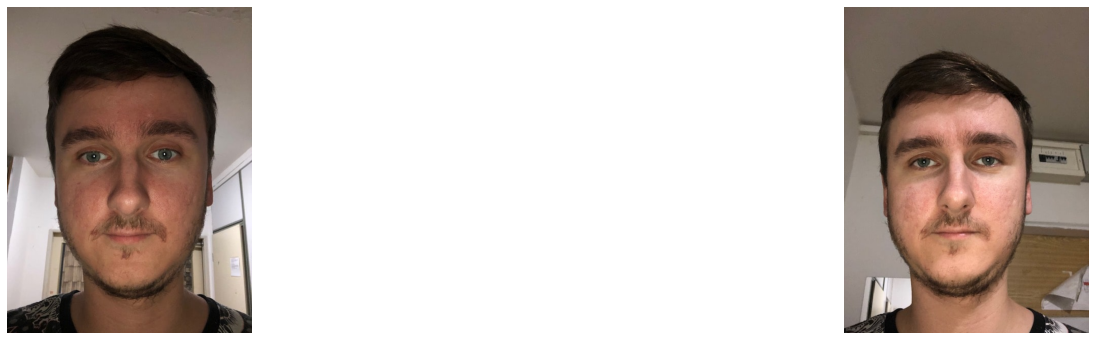

In [22]:
# plot original pictures (without BBs)
i = 1
plt.figure(figsize=(30,30))
for orig_image in ten_photos:
    image = cv2.imread(os.path.join(path_photos,orig_image))
    plt.subplot(5, 2, i)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    i += 1

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

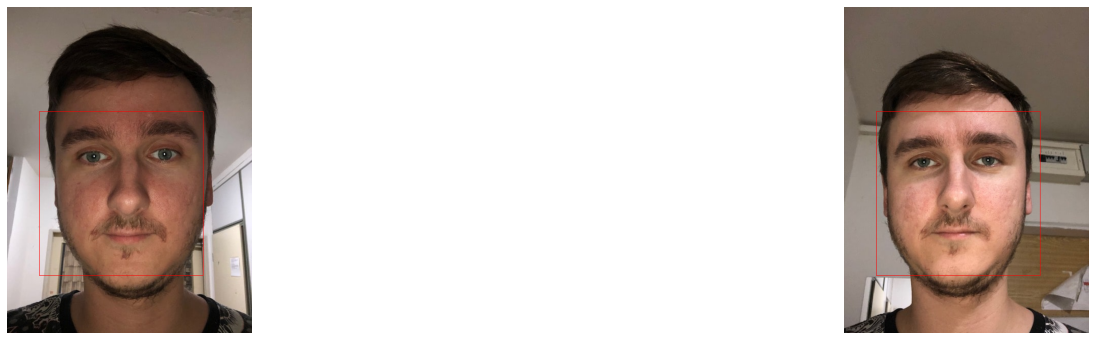

In [23]:
# plot copies of pictures with BBs
i = 1
plt.figure(figsize=(30,30))
for bb_photo in bb_photos_list:
    plt.subplot(5, 2, i)
    plt.imshow(cv2.cvtColor(bb_photo, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    i += 1

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [24]:
# Crop faces from the copies, insert into the results folder
for image, coordinate in coordinates.items():
    try:
        image_old = cv2.imread(os.path.join(path_processing, image))
        image_new = image_old[coordinate[0]:coordinate[2], coordinate[3]:coordinate[1]]
        cv2.imwrite(os.path.join(path_results, image), image_new)
        
        os.remove(os.path.join(path_processing, image))
    except Exception as e:
        print(e)

In [ ]:
def resize_img(img, resize_to):
    old_size = img.shape[:2]
    
    ratio = resize_to / min(old_size)
    
    width = round(img.shape[1] * ratio)
    height = round(img.shape[0] * ratio)
    dim = (width, height)

    
    resized_img = cv2.resize(img, dim)
    
    
    delta_w = dim[0] - resize_to
    delta_h = dim[1] - resize_to
    
    x1 = delta_w // 2
    y1 = delta_h // 2
    x2 = x1 + resize_to
    y2 = y1 + resize_to
    
    
    return resized_img[y1:y2, x1:x2]

In [ ]:
photos = os.listdir("C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\results\\")

In [ ]:
for image in photos:
    try:
        image_old = cv2.imread(os.path.join("C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\results\\", 
                                            image))
        image_new = resize_img(image_old, 224)
        cv2.imwrite(os.path.join("C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\processing\\", 
                                 image), image_new)
        
        #os.remove(os.path.join(path_processing, image))
    except Exception as e:
        print(e)